In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wellLogdisply

In [2]:
df = pd.read_csv('training_data.csv')
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


do that for inverse formation categurcal data to number data

In [20]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
le.fit(df['Formation'])

LabelEncoder()

In [24]:
#le.inverse_transform(df['Formation'])
df['Formation'] = le.transform(df['Formation'])
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,1,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,1,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,1,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,1,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,1,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


split data to train and test set

In [25]:
grouped = df.groupby('Well Name')
blind_df = grouped.get_group("SHANKLE")
blind_df

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
471,2,1,SHANKLE,2774.5,98.36,0.642,-0.1,18.685,2.9,1,1.000
472,2,1,SHANKLE,2775.0,97.57,0.631,7.9,16.745,3.2,1,0.984
473,2,1,SHANKLE,2775.5,98.41,0.615,12.8,14.105,3.2,1,0.968
474,2,1,SHANKLE,2776.0,85.92,0.597,13.0,13.385,3.4,1,0.952
475,2,1,SHANKLE,2776.5,83.16,0.592,12.3,13.345,3.4,1,0.935
...,...,...,...,...,...,...,...,...,...,...,...
915,8,12,SHANKLE,3006.0,32.84,1.120,-2.2,3.455,5.1,2,0.060
916,8,12,SHANKLE,3006.5,25.16,1.112,-1.6,2.890,4.8,2,0.045
917,8,12,SHANKLE,3007.0,25.16,1.112,-1.6,2.890,4.8,2,0.030
918,4,12,SHANKLE,3007.5,26.22,1.092,-0.4,3.400,4.5,2,0.030


In [29]:
df.shape

(3232, 11)

In [30]:
train_df = df.loc[df['Well Name'] !='SHANKLE']
train_df.shape

(2783, 11)

In [32]:
train_df.groupby('Well Name').count()

,Facies,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Well Name,,,,,,,,,,
CHURCHMAN BIBLE,404,404,404,404,404,404,404,404,404,404
CROSS H CATTLE,501,501,501,501,501,501,501,501,501,501
LUKE G U,461,461,461,461,461,461,461,461,461,461
NEWBY,463,463,463,463,463,463,463,463,463,463
NOLAN,415,415,415,415,415,415,415,415,415,415
Recruit F9,68,68,68,68,68,68,68,68,68,68
SHRIMPLIN,471,471,471,471,471,471,471,471,471,471


In [46]:
set1 = grouped.get_group("CHURCHMAN BIBLE").drop(labels="Well Name", axis=1)
set2 = grouped.get_group("CROSS H CATTLE").drop(labels="Well Name", axis=1)
set3 = grouped.get_group("LUKE G U").drop(labels="Well Name", axis=1)
set4 = grouped.get_group("NEWBY").drop(labels="Well Name", axis=1)
set5 = grouped.get_group("NOLAN").drop(labels="Well Name", axis=1)
set6 = grouped.get_group("Recruit F9").drop(labels="Well Name", axis=1)
set7 = grouped.get_group("SHRIMPLIN").drop(labels="Well Name", axis=1)
set7

,Facies,Formation,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Depth,,,,,,,,,
2793.0,3,1,77.45,0.664,9.9,11.915,4.6,1,1.000
2793.5,3,1,78.26,0.661,14.2,12.565,4.1,1,0.979
2794.0,3,1,79.05,0.658,14.8,13.050,3.6,1,0.957
2794.5,3,1,86.10,0.655,13.9,13.115,3.5,1,0.936
2795.0,3,1,74.58,0.647,13.5,13.300,3.4,1,0.915
...,...,...,...,...,...,...,...,...,...
3026.0,8,12,17.92,0.808,1.5,9.730,5.4,2,0.049
3026.5,8,12,16.51,0.814,2.0,8.275,5.5,2,0.039
3027.0,8,12,21.94,0.820,3.3,7.680,5.4,2,0.029


In [51]:
set1.min()

Facies          1.000
Formation       0.000
Depth        2917.500
GR             14.469
ILD_log10       0.100
DeltaPHI      -21.832
PHIND           2.320
PE              1.465
NM_M            1.000
RELPOS          0.011
dtype: float64

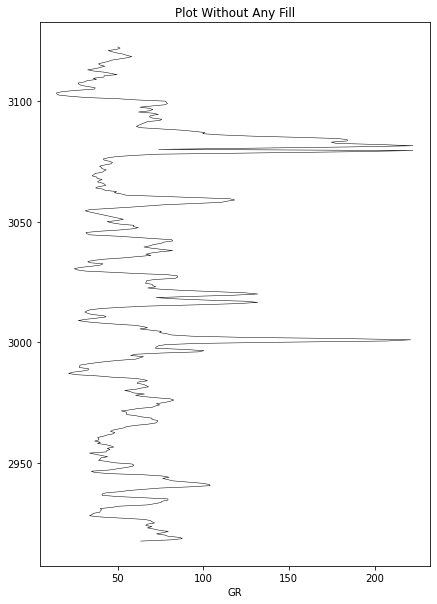

In [68]:
set1.plot(x='GR', y='Depth', c='black', lw=0.5, legend=False, figsize=(7,10))

plt.xlim(set1['GR'].min()-10,set1['GR'].max()+10)
plt.title('Plot Without Any Fill')
plt.show()